# Assignment 1: Sentiment Analysis Classifier

##### Group 26: Michal Dawid Kowalski (up202401554) | Pedro Maria Passos Ribeiro do Carmo Pereira (up201708807) | Santiago Romero Pineda (up)

In this assignment, we will build a sentiment analysis classifier using traditional machine learning techniques. The process includes pre-processing, feature extraction, and exploring both sparse and dense feature representations like word embeddings. We will use "traditional" machine learning classifier instead of deep learning models (CNNs, RNNs, Transformers). The focus will be on understanding text classification techniques and evaluating their performance on the given dataset using common classification metrics like accuracy, precision, recall, and F1-score.



In [ ]:
# Import libraries 
from our_eda import *
from our_modeling import *
from our_preprocessing import *
from our_feature_extraction import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from our_feature_selection import *
import gensim.downloader as api
from nltk.tokenize import word_tokenize

# 1. BESSTIE Dataset

## 1.1 Uploading Dataset Files from HuggingFace (https://huggingface.co/mindhunter23)

The dataset is hosted on Hugging Face under the username "mindhunter23." It consists of text data collected from Reddit and Google for the countries UK, AU, and IN. All texts are in English and are labeled with sentiment values: 0 for negative sentiment and 1 for positive sentiment. The dataset is already split into training and validation sets, making it ready for sentiment analysis tasks. It offers diverse content from different regions and platforms.

### - BESSTIE-reddit-sentiment-uk/

In [74]:
splits = {'train': 'reddit-sentiment-uk-train.jsonl', 'validation': 'reddit-sentiment-uk-valid.jsonl'}
df_reddit_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["train"], lines=True)
df_reddit_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["validation"], lines=True)
df_reddit_sentiment_uk.head(5)

,id,text,sentiment_label
0,1cimjpr,"So instead of making savings, they continued t...",0
1,1d35qlg,Needless story to have dragged into the electi...,0
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0
3,1d5a8wa,How did you not get mind controlled at birth t...,0
4,1d5l3e9,"Talk lately of conscription, having a store of...",0


In [76]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  892       88.58
1                  115       11.42
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  122       88.41
1                   16       11.59
None


### - BESSTIE-reddit-sentiment-au/

In [79]:
splits = {'train': 'reddit-sentiment-au-train.jsonl', 'validation': 'reddit-sentiment-au-valid.jsonl'}
df_reddit_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["train"], lines=True)
df_reddit_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["validation"], lines=True)
df_reddit_sentiment_au.head(5)

,id,text,sentiment_label
0,1d2d56d,"No its more about risk management, why accept ...",1
1,1d2cfsd,I don’t play this game. \n\nThem: “What are yo...,0
2,1cw9vcr,Well I'm not really confident that we'll see m...,0
3,1czvemb,He's not wrong though alot of media is RW sla...,0
4,1d3x6bo,Please contact safe transport Victoria. This i...,1


In [80]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                 1200       68.07
1                  563       31.93
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  164       68.05
1                   77       31.95
None


### - BESSTIE-google-sentiment-uk

In [82]:
splits = {'train': 'google-sentiment-uk-train.jsonl', 'validation': 'google-sentiment-uk-valid.jsonl'}
df_google_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["train"], lines=True)
df_google_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["validation"], lines=True)
df_google_sentiment_uk.head(5)

,id,text,sentiment_label
0,1.046000e+20,Tricky me because I was checking in over midni...,1
1,1.161344e+20,It's lots more cheaper than the Odeon although...,1
2,1.034757e+20,My first time and last time in this place. It ...,0
3,1.073389e+20,"You know, its not bad at all, you get plenty o...",1
4,1.172204e+20,It's. It's OK for a quick fix of junk food. Re...,0


In [83]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                 1359       74.79
0                  458       25.21
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  186        75.0
0                   62        25.0
None


### - BESSTIE-google-sentiment-au

In [87]:
splits = {'train': 'data/google-sentiment-au-train.jsonl', 'validation': 'data/google-sentiment-au-valid.jsonl'}
df_google_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["train"], lines=True)
df_google_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["validation"], lines=True)
df_google_sentiment_au.head(5)

,id,text,sentiment_label
0,1.132555e+20,This was one of the best dishes I've EVER had!...,1
1,1.101411e+20,This Mexican restaurant in Penrith is a great ...,1
2,1.103038e+20,"This was not to bad, I ordered the big pork ri...",1
3,1.107520e+20,Clean cool and a nice smaller casino to check ...,1
4,1.152390e+20,Well set out. Great areas to enjoy. Good food ...,1


In [90]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  695       73.47
0                  251       26.53
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                   96       73.85
0                   34       26.15
None


### - BESSTIE-reddit-sentiment-in

In [92]:
splits = {'train': 'reddit-sentiment-in-train.jsonl', 'validation': 'reddit-sentiment-in-valid.jsonl'}
df_reddit_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["train"], lines=True)
df_reddit_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["validation"], lines=True)
df_reddit_sentiment_in.head(5)

,id,text,sentiment_label
0,1d2o00l,Zepto has a mandate that the delivery boy need...,1
1,1d5fcvf,Mujhe bhi thoda paisa do,0
2,1d04uk7,Nooo don't protest against secular freedom fig...,0
3,1d5dl6q,Har 3 mahine baad kisi bhi global celebrity ko...,0
4,1d66tng,Just because you don't find anything serious b...,0


In [95]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                 1256       74.54
1                  429       25.46
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  172       74.78
1                   58       25.22
None


### - BESSTIE-google-sentiment-in

In [97]:
splits = {'train': 'google-sentiment-in-train.jsonl', 'validation': 'google-sentiment-in-valid.jsonl'}
df_google_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["train"], lines=True)
df_google_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["validation"], lines=True)
df_google_sentiment_in.head(5)

,id,text,sentiment_label
0,1.114268e+20,They have an amazing hospitality structure loc...,1
1,1.116605e+20,The attender attitude is not welcoming. Ordere...,0
2,1.134214e+20,The taste is good.. Decent staff.. But the atm...,0
3,1.055034e+20,"Wahi purani jagah, wahi purani yaadein..... Ra...",1
4,1.092858e+20,"An extremely over hyped biriyani, Definitely i...",1


In [100]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                 1232       74.76
0                  416       25.24
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  168       74.67
0                   57       25.33
None


# 2. Initial Data Preprocessing

## 2.1 Testing text_preprocess() func

In [ ]:
# Test the preprocessing function 
print('Original:\n', df_reddit_sentiment_uk.loc[0].text,'\n')
print('Lemmatization:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text, remove_digits=True, stemmer=Stemmer.WordNet),'\n')
print('Stemming:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text),'\n')

## 2.2 Concatening datasets into single Dataframe
### SENTIMENT DATASET

In [ ]:
# Assue all datasets are already loaded as DataFrames
combined_sentiment_df = pd.concat(
    [
        df_reddit_sentiment_uk,
        df_reddit_sentiment_au,
        df_google_sentiment_uk,
        df_google_sentiment_au,
        df_reddit_sentiment_in,
        df_google_sentiment_in
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

# Assue all datasets are already loaded as DataFrames
combined_sentiment_df_val = pd.concat(
    [
        df_reddit_sentiment_uk_val,
        df_reddit_sentiment_au_val,
        df_google_sentiment_uk_val,
        df_google_sentiment_au_val,
        df_reddit_sentiment_in_val,
        df_google_sentiment_in_val
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

In [ ]:
# Save combined data
combined_sentiment_df.to_csv("data_sentiment_preprocessed.csv", index=False)
combined_sentiment_df_val.to_csv("data_sentiment_preprocessed_val.csv", index=False)

# 3. Exploratory Data Analysis

Total rows in combined training dataset: 8860


Classes Distribution in Training Dataset:

                 Count  Percentage
sentiment_label                   
0                 4470       50.45
1                 4390       49.55




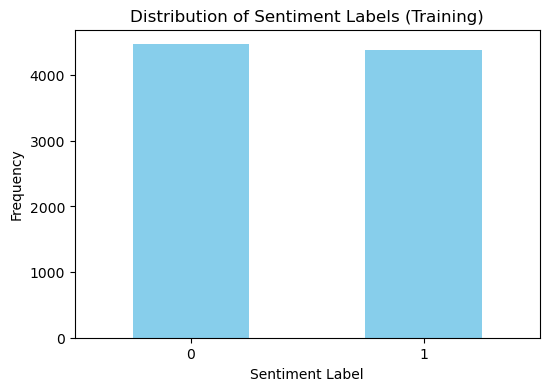

Training Dataset:



,id,text,sentiment_label,clean_text,tokenized_text
0,1cimjpr,"So instead of making savings, they continued t...",0,instead make saving continue spend money not y...,"[instead, make, saving, continue, spend, money..."
1,1d35qlg,Needless story to have dragged into the electi...,0,needless story drag election party rumor sit m...,"[needless, story, drag, election, party, rumor..."
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0,ideal world would insight mr james day think i...,"[ideal, world, would, insight, mr, james, day,..."
3,1d5a8wa,How did you not get mind controlled at birth t...,0,not get mind control birth though one free thi...,"[not, get, mind, control, birth, though, one, ..."
4,1d5l3e9,"Talk lately of conscription, having a store of...",0,talk lately conscription store food water drug...,"[talk, lately, conscription, store, food, wate..."


In [105]:
# Optional, when already have necessary data files
# combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
# combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

# Display the combined DataFrame
print(f"Total rows in combined training dataset: {len(combined_sentiment_df)}\n")
print('\nClasses Distribution in Training Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels (Training)')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Training Dataset:\n")
combined_sentiment_df.head(5)

Total rows in combined validation dataset: 1211


Classes Distribution in Validation Dataset:

                 Count  Percentage
sentiment_label                   
0                 4470       50.45
1                 4390       49.55




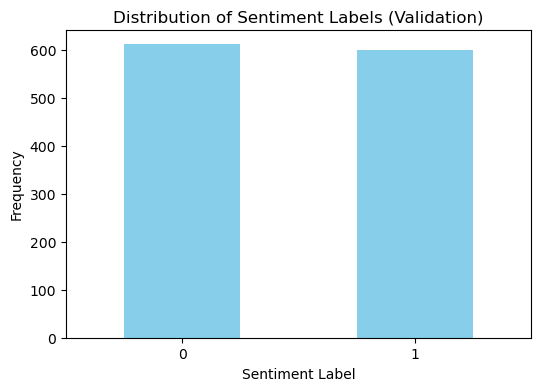

Validation Dataset:



,id,text,sentiment_label,clean_text,tokenized_text
0,1cpkok5,it was so pretty!,1,pretty,[pretty]
1,1c5a4oh,This man is a fuxking hero,1,man fucking hero,"[man, fucking, hero]"
2,1bj8f3p,I see the plan to destroy the NHS is still on ...,0,see plan destroy no still schedule,"[see, plan, destroy, no, still, schedule]"
3,1d38fpx,"They are both truly awful, James Whale likes t...",0,truly awful james whale like shout people neve...,"[truly, awful, james, whale, like, shout, peop..."
4,1b2xlw6,I really wish the British Empire was better ta...,0,really wish british empire good taught school ...,"[really, wish, british, empire, good, taught, ..."


In [107]:
# Display the combined DataFrame
print(f"Total rows in combined validation dataset: {len(combined_sentiment_df_val)}\n")
print('\nClasses Distribution in Validation Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df_val['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels (Validation)')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Validation Dataset:\n")
combined_sentiment_df_val.head(5)

#### Number of characters per review:

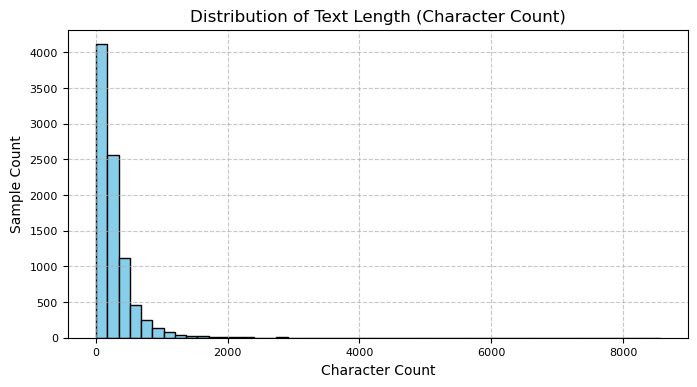

In [109]:
plt.figure(figsize=(8, 4))
combined_sentiment_df['text'].str.len().hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length (Character Count)', fontsize=12)
plt.xlabel('Character Count', fontsize=10)
plt.ylabel('Sample Count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

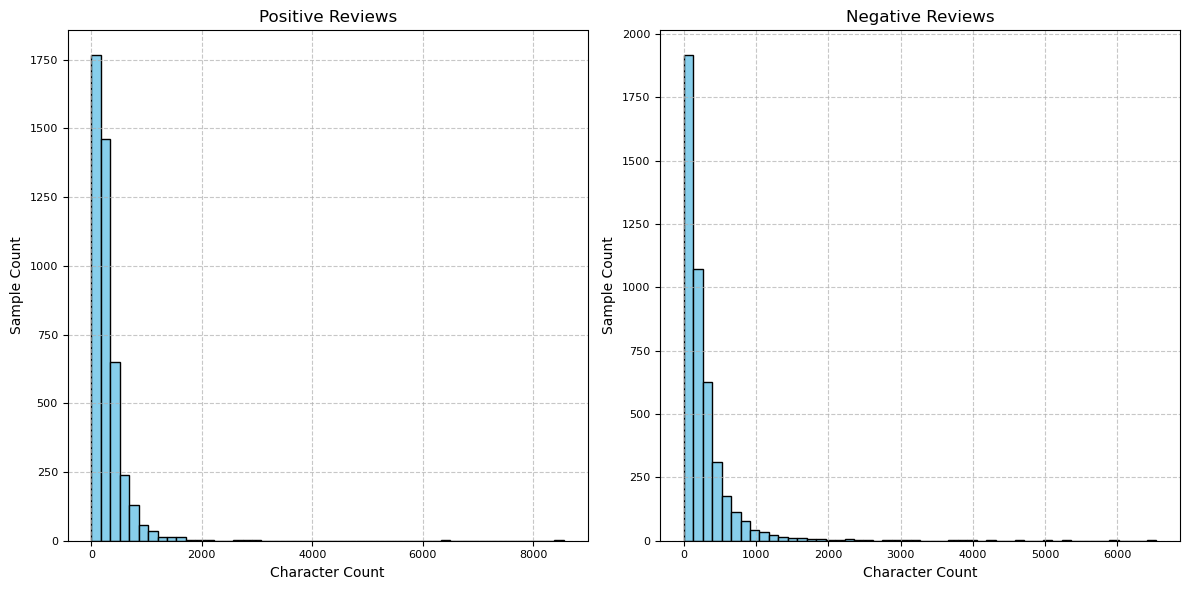

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 1]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Positive Reviews', fontsize=12)
ax1.set_xlabel('Character Count', fontsize=10)
ax1.set_ylabel('Sample Count', fontsize=10)
ax1.tick_params(axis='both', labelsize=8)
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 0]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Negative Reviews', fontsize=12)
ax2.set_xlabel('Character Count', fontsize=10)
ax2.set_ylabel('Sample Count', fontsize=10)
ax2.tick_params(axis='both', labelsize=8)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Most common words:

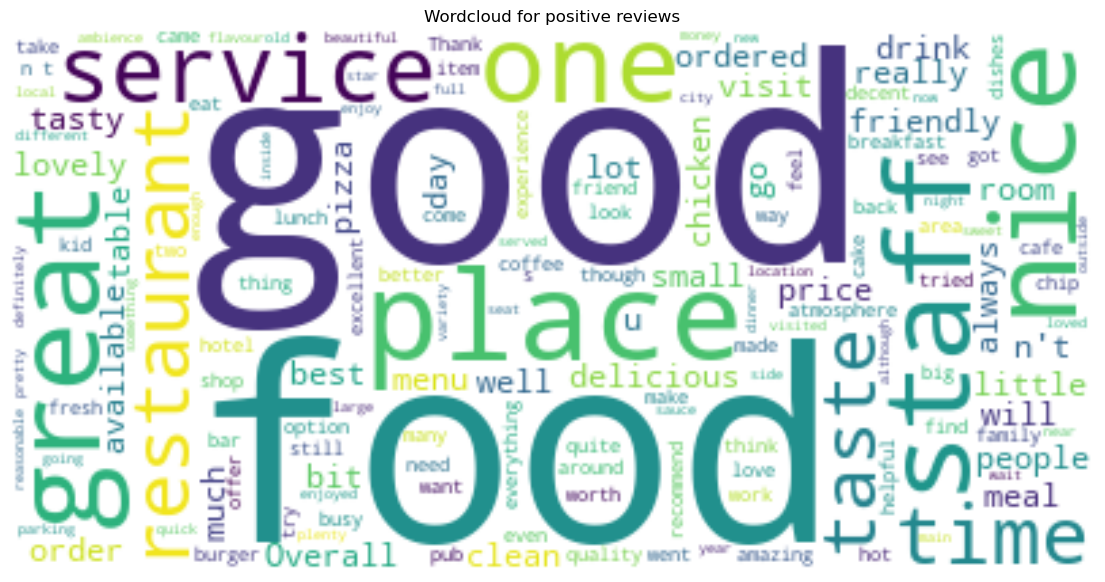

In [118]:
# POSITIVE SENTIMENT WODDCLOUD
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==1]['text'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for positive reviews')
plt.show()

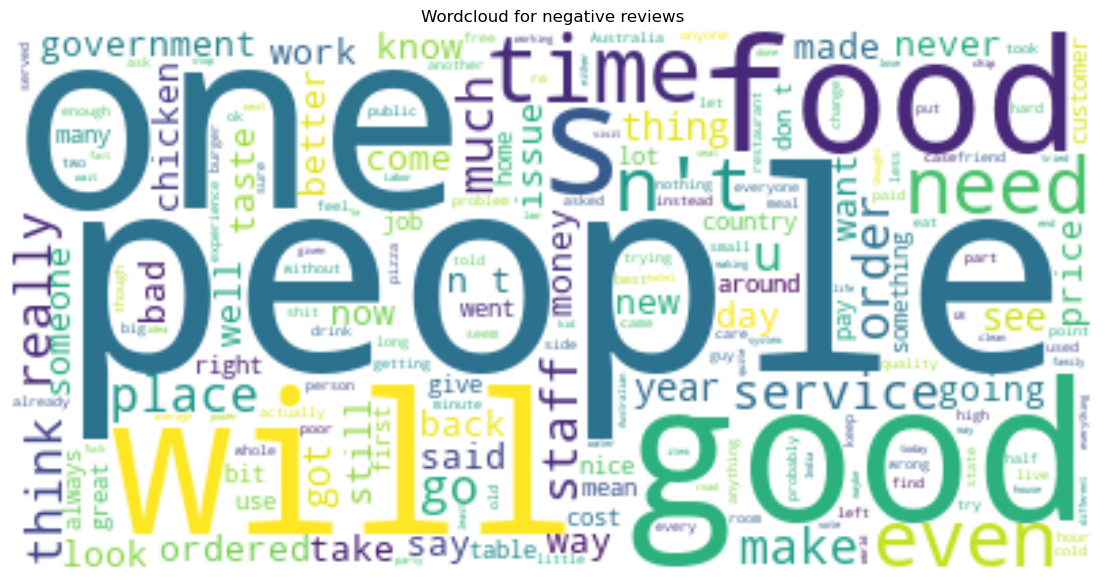

In [120]:
# NEGATIVE SENTIMENT WORDCLOUD
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==0]['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for negative reviews')
plt.show()

# 4. Text Preprocessing

The `text_preprocess()` function in the `_preprocessing.py` file applies several essential text preprocessing techniques to prepare the data for further analysis and modeling:

- **Convert to Lowercase**: Transforms all text to lowercase to ensure uniformity.
- **Remove URLs and Emails**: Eliminates any URLs and email addresses found in the text.
- **Remove Digits**: Removes any numeric characters that might not be relevant for the analysis.
- **Correct Misspellings**: Automatically detects and corrects spelling mistakes to improve text quality.
- **Expand Contractions**: Expands common contractions (e.g., "can't" to "cannot", "i'm" to "i am") for consistency in the text.
- **POS Tagging and Lemmatization (optional: Stemming)**: Performs part-of-speech tagging and lemmatization using the `lemm_text()` function, reducing words to their base or root forms.
- **Remove Stopwords**: Removes stopwords, with the option to retain negations for preserving sentiment (optional flag to enable/disable this).
- **Delete Punctuation**: Strips away punctuation marks that do not contribute to the analysis.
- **Remove Extra Spaces**: Cleans up extra spaces, including leading and trailing spaces, to normalize the text.

These preprocessing techniques ensure that the text data is clean, consistent, and ready for feature extraction or modeling.


### - Training Dataset

In [ ]:
# Preprocessing + Lemmatization 
combined_sentiment_df['clean_text'] = combined_sentiment_df['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))

In [ ]:
# Tokenization
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df.head(5)

In [ ]:
# Save preprocessed training data
combined_sentiment_df.to_csv('data_sentiment_preprocessed.csv', index=False)

### - Validation Dataset

In [ ]:
# Preprocessing + Lemmatization 
combined_sentiment_df_val['clean_text'] = combined_sentiment_df_val['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))
# Tokenization
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val.head(5)
# Save preprocessed validation data
combined_sentiment_df_val.to_csv('data_sentiment_preprocessed_val.csv', index=False)

In [126]:
# Optional, read datasets from files
combined_sentiment_df = pd.read_csv('data_sentiment_preprocessed.csv')
combined_sentiment_df_val = pd.read_csv('data_sentiment_preprocessed_val.csv')

#### - Handling possible Missing Values after text preprocessing:

In [129]:
print(combined_sentiment_df.isnull().value_counts())
combined_sentiment_df = combined_sentiment_df.dropna() # Drop rows where preprocessing didnt extract any tokens

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             8860
                               True        False                6
Name: count, dtype: int64


In [131]:
print(combined_sentiment_df_val.isnull().value_counts())
combined_sentiment_df_val = combined_sentiment_df_val.dropna()

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             1211
                               True        False                1
Name: count, dtype: int64


In [135]:
# Tokenization because after reading from the file list with tokens converts into str
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df.head(5)

,id,text,sentiment_label,clean_text,tokenized_text
0,1cimjpr,"So instead of making savings, they continued t...",0,instead make saving continue spend money not y...,"[instead, make, saving, continue, spend, money..."
1,1d35qlg,Needless story to have dragged into the electi...,0,needless story drag election party rumor sit m...,"[needless, story, drag, election, party, rumor..."
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0,ideal world would insight mr james day think i...,"[ideal, world, would, insight, mr, james, day,..."
3,1d5a8wa,How did you not get mind controlled at birth t...,0,not get mind control birth though one free thi...,"[not, get, mind, control, birth, though, one, ..."
4,1d5l3e9,"Talk lately of conscription, having a store of...",0,talk lately conscription store food water drug...,"[talk, lately, conscription, store, food, wate..."


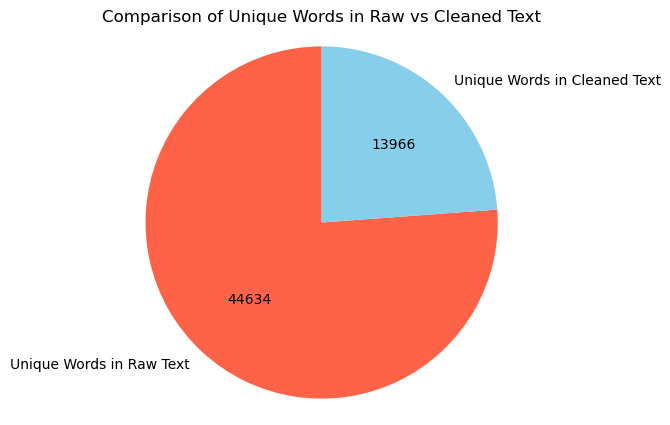

In [137]:
# Check number of unique words before and after the preprocessing
all_words = ' '.join(combined_sentiment_df['text']).split()
unique_words = set(all_words)

all_words_clean = ' '.join(combined_sentiment_df['clean_text']).split()
unique_words_clean = set(all_words_clean)

labels = ['Unique Words in Raw Text', 'Unique Words in Cleaned Text']
sizes = [len(unique_words), len(unique_words_clean)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{int(p * sum(sizes) / 100)}', startangle=90, colors = ['#FF6347', 'skyblue'])
plt.title('Comparison of Unique Words in Raw vs Cleaned Text')
plt.axis('equal')
plt.show()

# 5. Features Extraction

In the `our_feature_extraction.py` file, we implement various techniques for extracting features from the text data. These methods are divided into sparse and dense representations of text, offering flexibility depending on the type of analysis and model being used.

#### Sparse Representations

- **Bag of Words (BOW)**: A simple method where each document is represented as a vector of word counts, without considering word order. This method creates a sparse matrix of word frequencies.
- **One-Hot Encoding (BOW)**: An extension of BOW where each word is represented as a one-hot encoded vector, where each word is mapped to a unique index in the vector.
- **TF-IDF (Term Frequency - Inverse Document Frequency)**: A more advanced method than BOW that weighs the words based on their frequency in the document and their rarity across the entire corpus. This technique helps highlight important words in the text.
- **Bigrams (O-H)BOW/TF-IDF**: Instead of individual words, this method considers pairs of consecutive words (bigrams) to capture context and word combinations that may provide additional meaning.
  
  - **Token Frequency Filtering**: For all of the above sparse techniques, there is an option to filter out infrequent or overly common tokens based on their frequency. This allows reducing the dimensionality of the feature space by excluding words that may not contribute significantly to the analysis.

#### Dense Representations

- **Word2Vec**: A dense representation technique where words are embedded into dense vectors in a continuous vector space. These embeddings are learned by the Word2Vec model, capturing semantic relationships between words based on their context (also Handling Multi Word Expressions)
- **BerTopic**: A topic modeling technique based on transformer embeddings, which uses BERT (Bidirectional Encoder Representations from Transformers) embeddings to generate high-quality topics. This technique is useful for extracting meaningful topics from a collection of documents.

These feature extraction methods are essential for converting raw text data into numerical representations that can be processed by machine learning models.


In [145]:
# Split the data info into Train and Test set
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label

## 5.1 Basic BoW
+ also removing rare tokens that occurs less than 3 times

In [626]:
# Convert X_train and X_val into proper type
X_train_str = [' '.join(tokens) for tokens in combined_sentiment_df.tokenized_text]

X_val_str = [' '.join(tokens) for tokens in combined_sentiment_df_val.tokenized_text]

word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train_str, X_val_str, debug=True, min_refs=2)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [28]:
# 10 most common words
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())

top_indices = np.argsort(word_counts)[::-1]
top_words = vocab[top_indices[:10]]
top_counts = word_counts[top_indices[:10]]

print('Top 10 most common words:\n')
for word, count in zip(top_words, top_counts):
    print(f"{word}: {count}")

Top 10 most common words:

not: 4523
good: 3415
food: 2608
get: 1843
go: 1610
place: 1569
like: 1549
would: 1527
time: 1374
one: 1363


In [30]:
# Just values test
unique = np.unique(X_train_vec[2].toarray())
print('Unique values:', unique)

Unique values: [0 1 2]


## 5.2 One-Hot Encoding BoW
+ also removing rare tokens that occurs less than 3 times

In [34]:
word_counts, vocab, selected_words, vectorizer, X_train_hot, X_val_hot = basic_bag(X_train_str, X_val_str, min_refs=2, ohe=True, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [36]:
# Checking if dataset is binary
unique = np.unique(X_train_hot.toarray())
print('Unique values:', unique)

Unique values: [0 1]


## 5.3 TF-IDF

In [38]:
# TF-IDF Representation
word_counts, vocab, selected_words, vectorizer, X_train_vec_tf, X_val_vec_tf = tf_idf(X_train_str, X_val_str, debug=True, min_refs=2)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


## 5.4 N-grams

### 5.4.1 Bigrams BoW Count

In [18]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi, X_val_vec_bi = basic_bag(X_train_str, X_val_str, ngram_range=(2,2), debug=True, ohe=True)

Shape (X_train_vec):  (8860, 161809)
Shape (X_val_vec):  (1211, 161809)


In [35]:
bigram_vocab = vectorizer.get_feature_names_out()
bigram_counts = np.asarray(X_train_vec_bi.sum(axis=0)).flatten()

bigram_freq = list(zip(bigram_vocab, bigram_counts))

# Sorting bigrams
sorted_bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
print("10 most common bigrams:\n")
for bigram, count in sorted_bigram_freq[:10]:
    print(f"{bigram}: {count}")

10 most common bigrams:

food good: 193
staff friendly: 160
not good: 138
good place: 125
good food: 120
taste good: 118
really good: 117
look like: 114
service good: 108
friendly staff: 106


### 5.4.2 Bigrams TF-IDF

In [23]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi_tf, X_val_vec_bi_tf = tf_idf(X_train_str, X_val_str, ngram_range=(2, 2) , min_refs=2, debug=True)

Shape (X_train_vec):  (8860, 161809)
Shape (X_train_vec) after reduction:  (8860, 22912)
Shape (X_val_vec):  (1211, 22912)


## 5.5 Words Embedding

### Word2Vec

#### - Own Word2Vec Model (CBOW)

In [59]:
# Word Embedding CBOW
word2vec_model1 = w2v_embeddings(X_train, alpha=0.05, vector_size=300, window=10, epochs=20, min_count=2)

In [61]:
# Similarity between tokens
try:
    similarity_tokens = word2vec_model1.wv.similarity('cat', 'dog')
    print(f"Similarity: {similarity_tokens:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")

# Most similar words to the specific token
try:
    similar_words_token = word2vec_model1.wv.most_similar('cat', topn=5)
    print("Most similar words:", similar_words_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Token which doesn't match (Odd-One-Out)
try: 
    not_match_token = word2vec_model1.wv.doesnt_match(['cat','dog','juice'])
    print('Not matching word:', not_match_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Perform an analogy task
try:
    analogy_result = word2vec_model1.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("Analogy result:", analogy_result)
except KeyError as e:
    print(f"KeyError: {e}")

Similarity: 0.8344
Most similar words: [('actress', 0.9955834150314331), ('dakota', 0.9949900507926941), ('mesh', 0.9949254989624023), ('goodby', 0.994763970375061), ('balanced', 0.9944737553596497)]
Not matching word: juice
Analogy result: [('indian', 0.9518129825592041)]


In [63]:
print('Number of unique words in the Word2vec Model:',len(word2vec_model1.wv.key_to_index))

Number of unique words in the Word2vec Model: 8130


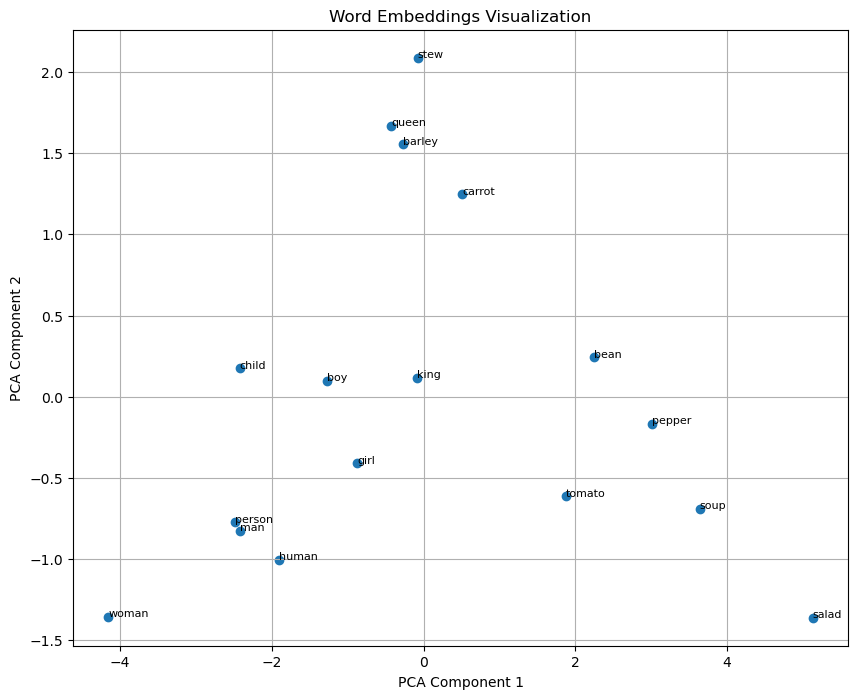

In [65]:
# Visualization
# List of words that we want to display
words_to_explore= ['woman', 'man', 'queen', 'king', 'human', 'person', 'girl', 'child', 'boy', 'salad', 'lettuce', 'tomato', 'soup', 'turnip', 'arugula', 'pepper', 'greens', 'barley', 'bean', 'stew', 'carrot']
visualize_word_embeddings(word2vec_model1, words_to_explore)

In [67]:
# Generate embeddings
X_train_vec_w2v, X_val_vec_w2v = w2v_embeddings_split(X_train, X_val, word2vec_model1)

#### - Own Word2Vec Model (Skip Gram)

In [35]:
word2vec_model2 = w2v_embeddings(X_train, sg=True, alpha=0.05, vector_size=300, window=5, epochs=50, min_count=2)

In [36]:
# Similarity between tokens
try:
    similarity_tokens = word2vec_model2.wv.similarity('cat', 'dog')
    print(f"Similarity: {similarity_tokens:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")

# Most similar words to the specific token
try:
    similar_words_token = word2vec_model2.wv.most_similar('dog', topn=10)
    print("Most similar words:", similar_words_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Token which doesn't match (Odd-One-Out)
try: 
    not_match_token = word2vec_model2.wv.doesnt_match(['cat','dog','wine'])
    print('Not matching word:', not_match_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Perform an analogy task
try:
    analogy_result = word2vec_model2.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("Analogy result:", analogy_result)
except KeyError as e:
    print(f"KeyError: {e}")

Similarity: 0.6531
Most similar words: [('drinking', 0.772953450679779), ('pet', 0.7704237103462219), ('cigar', 0.769462525844574), ('soothe', 0.7648403644561768), ('fountain', 0.7639871835708618), ('refresh', 0.7617489099502563), ('rider', 0.7597284913063049), ('basket', 0.7571843266487122), ('mixture', 0.7553753852844238), ('bartender', 0.754408597946167)]
Not matching word: wine
Analogy result: [('kingdom', 0.697913408279419)]


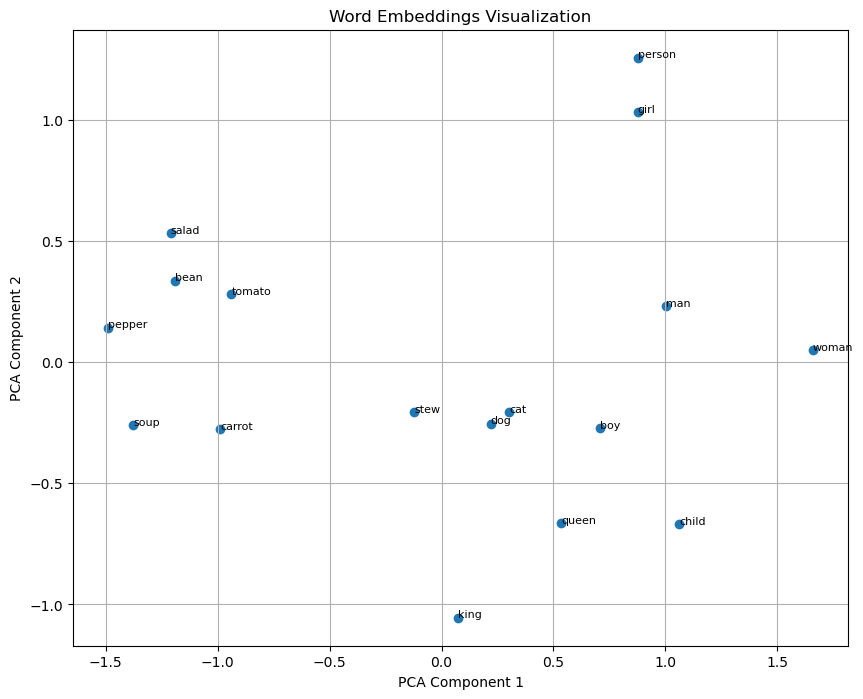

In [37]:
# Visualization
# List of words that we want to display
words_to_explore= ['woman', 'man', 'queen', 'king', 'person', 'girl', 'child', 'boy', 'salad', 'lettuce', 'turnip', 'arugula', 'pepper', 'greens', 'bean', 'stew', 'carrot','tomato', 'soup', 'cat', 'dog', 'hamster']
visualize_word_embeddings(word2vec_model2, words_to_explore)

In [ ]:
# Generate embeddings
X_train_vec_w2v, X_val_vec_w2v = w2v_embeddings_split(X_train, X_val, word2vec_model1)

### - Bert Embeddings

In [ ]:
# Split the data
X_train = combined_sentiment_df.text.astype(str).tolist()
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.text.astype(str).tolist()
y_val = combined_sentiment_df_val.sentiment_label

# Generate embeddings
X_train_vec, X_val_vec = bert_embeddings_split(X_train, X_val)

# 6. Feature Selection

The following methods are used to reduce the dimensionality of the dataset by selecting the most relevant features:

- **feat_filtering()**  
  Performs feature selection using statistical tests:
  - **Method**: Select top `k` features (`'k'`) or top `k` percentile (`'percentile'`).
  - **Functions**: Uses `'chi2'`, `'f'`, or `'mutual_info'` to score features.

- **rfe()**  
  Uses Recursive Feature Elimination with Cross-Validation (RFECV) to iteratively remove less important features based on model performance, finding the optimal feature set.
  - Supports models like `'svm'`, `'logistic'`, and `'rf'`.



In [ ]:
from our_feature_extraction import basic_bag, tf_idf
# Split the data
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label
word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train, X_val, ohe=True, debug=True)

In [20]:
from our_feature_selection import *
# Features Selection using Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec, y_train, X_val_vec)
print(X_train_redux.shape)

(8860, 8068)
(8860, 807)


In [ ]:
# RFE Features Selectiton
sel, X_train_rfe, X_test_rfe = rfe(X_train_vec, y_train, X_val_vec)
print(X_train_rfe.shape)

# 7. Modeling

In this step, we evaluate several machine learning models to classify the data. Below are the methods used for training and evaluation:

- **Support Vector Machine (SVM)**  
  The `support_vector_machine()` function applies a Support Vector Classifier (SVC) with hyperparameter tuning using Grid Search. The parameters tuned include:
  - `C` (regularization parameter)
  - `kernel` (type of kernel: linear, rbf, poly, sigmoid)
  - `gamma` (kernel coefficient)
  
  The function uses cross-validation (`cv=5`) and reports the best parameters, best cross-validation accuracy, and the classification report with accuracy for the validation set.

- **Naive Bayes (NB)**  
  The `nb()` function uses the Multinomial Naive Bayes model to classify the data. After fitting the model, predictions are made on the validation set, and the performance is evaluated using accuracy, classification report, and confusion matrix.

- **Random Forest** (Skipped)  
  Although the `random_forest()` function was prepared for training a Random Forest model with hyperparameter tuning (using grid search for parameters like `n_estimators`, `max_depth`, etc.), we decided to skip the random forest model in this case due to the large number of tests involved.

These models are evaluated on their ability to classify the data based on the training and validation sets. We focus on SVM and Naive Bayes for our final model selection.


## 7.1 Naive Bayes Model

### - Basic BoW

In [ ]:
# Basic BoW
nb(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [54]:
nb(X_train_hot, X_val_hot, y_train, y_val)

Accuracy: 0.8084

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       611
           1       0.79      0.84      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[473 138]
 [ 94 506]]


### - TF-IDF

In [13]:
nb(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Accuracy: 0.8068

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       611
           1       0.78      0.86      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[462 149]
 [ 85 515]]


### - Bigrams Count

In [19]:
nb(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

Accuracy: 0.7919

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       611
           1       0.78      0.81      0.80       600

    accuracy                           0.79      1211
   macro avg       0.79      0.79      0.79      1211
weighted avg       0.79      0.79      0.79      1211


Confusion Matrix:
[[470 141]
 [111 489]]


### - Bigrams TF-IDF

In [24]:
nb(X_train_vec_bi_tf, X_val_vec_bi_tf, y_train, y_val)

Accuracy: 0.7903

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       611
           1       0.80      0.77      0.78       600

    accuracy                           0.79      1211
   macro avg       0.79      0.79      0.79      1211
weighted avg       0.79      0.79      0.79      1211


Confusion Matrix:
[[496 115]
 [139 461]]


## 7.2 Support Vector Machine (SVM)

### - Basic BoW

In [ ]:
support_vector_machine(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [34]:
support_vector_machine(X_train_hot, X_val_hot, y_train, y_val)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy: 0.7880361173814899
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       611
           1       0.87      0.78      0.82       600

    accuracy                           0.83      1211
   macro avg       0.83      0.83      0.83      1211
weighted avg       0.83      0.83      0.83      1211

Accuracy: 0.8298926507018992


### - TF-IDF

In [26]:
support_vector_machine(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7993227990970654
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       611
           1       0.88      0.82      0.85       600

    accuracy                           0.86      1211
   macro avg       0.86      0.86      0.86      1211
weighted avg       0.86      0.86      0.86      1211

Accuracy: 0.8587943848059455


### - Bigrams

In [ ]:
support_vector_machine(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

### - Word2Vec Embedding

In [53]:
# Word2Vec CBOW 
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

support_vector_machine(X_train_vec_w2v, X_val_vec_w2v, y_train, y_val)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7987584650112867
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       611
           1       0.83      0.81      0.82       600

    accuracy                           0.82      1211
   macro avg       0.83      0.82      0.82      1211
weighted avg       0.83      0.82      0.82      1211

Accuracy: 0.8249380677126342


## 7.3 Random Forest

### - Basic BoW

In [ ]:
random_forest(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [ ]:
random_forest(X_train_hot, X_val_hot, y_train, y_val)

### - TF-IDF

In [ ]:
random_forest(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

### - Bigrams

In [ ]:
random_forest(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

## 7.4 Embedding Modeling

### NB

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_val_scaled = scaler.transform(X_val_vec)


nb(X_train_scaled, X_val_scaled, y_train, y_val)

sel, X_train_redux, X_val_redux = feat_filtering(X_train_scaled, y_train, X_val_scaled, k=2)

nb(X_train_redux, X_val_redux, y_train, y_val)

### SVM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_val_scaled = scaler.transform(X_val_vec)

In [ ]:
support_vector_machine(X_train_scaled, X_val_scaled, y_train, y_val) # Best Parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'} for bert , but actually it doesn't really matter

In [ ]:
from our_feature_selection import rfe

rfe(X_train_vec, y_train, X_val_vec, min_features_to_select=int(X_train_vec.shape[1]*0.9), save_file=True)

In [ ]:
import pickle
with open('./rfecv_svm.pickle', "rb") as f:
    rfe_sel = pickle.load(f)

In [ ]:
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(probability=True))])
best_model.fit(X_train_vec, y_train)

y_pred = best_model.predict(X_val_vec)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

# sel, X_train_redux, X_val_redux = feat_filtering(X_train_scaled, y_train, X_val_vec, k=95)
# best_model.fit(X_train_redux, y_train)

# y_pred = best_model.predict(X_val_redux)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Accuracy:", accuracy_score(y_val, y_pred))

# X_train_redux = rfe_sel.transform(X_train_scaled)
# X_val_redux = rfe_sel.transform(X_val_scaled)
# best_model.fit(X_train_redux, y_train)

# y_pred = best_model.predict(X_val_redux)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [ ]:
with open('./best_model.pickle', "wb") as f:
    pickle.dump(best_model, f)

# 8. Error Analysis

We use **LIME** (Local Interpretable Model-Agnostic Explanations) to interpret the predictions of our model. The `explain_point_label()` function provides a detailed explanation of individual predictions by displaying the most important features. We identify misclassifications with `find_errors()`, then explain a random sample of these errors to better understand the model's behavior and potential weaknesses.


In [ ]:
with open('./best_model.pickle', "rb") as f:
    best_model = pickle.load(f)

In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer()

def explain_point_label(explainer, predict, pt, num_features=10, num_samples=20):

  explanation = explainer.explain_instance(
      pt,
      predict,
      num_features=5,  # Number of words to display as important
      num_samples=50,  # Number of perturbations to create
  )
  explanation.show_in_notebook(text=True)
  return explanation

def predict_lime(pt):
  dings = bert_embeddings(pt)
  pred = best_model.predict_proba(dings)
  return pred 

In [ ]:
def find_errors(model, X_val, y_val):
    errors = []
    i = 0
    for row, label in zip(X_val, y_val):
        i += 1
        pred = predict_lime([row])
        if pred[0] != label:
            errors.append(row)

    return errors

errors = find_errors(best_model, X_val, y_val)
len(errors)

In [ ]:
error_df = pd.DataFrame(errors)

In [ ]:
error_df.to_json('./errors.json', orient='records')

In [ ]:
errors_to_explain = error_df.sample(20)

In [ ]:
def explain_sample(sample, explainer, predict, num_features=10, num_samples=10):
    for i, row in sample.iterrows():
        print(row[0])
        explain_point_label(explainer, predict, row[0], num_features=num_features, num_samples=num_samples)

explain_sample(errors_to_explain, explainer, predict_lime)